In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile

In [40]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
with zipfile.ZipFile('data.json.zip', 'r') as zipped:
    zipped.extractall('data')

In [3]:
df = pd.read_json("data/data_analysis.json")

In [5]:
df.head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680


In [6]:
df.describe()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
count,999986,999986,999986,962352,999986,590889,943092,999986,916125,999988
unique,892120,1184,13720,15,890723,575154,17,59,11,26397
top,1 S DEARBORN ST,61111000,NEW YORK,1 to 4,Farmers Insurance,3037705531,"Less Than $500,000",CA,10+ years,10001
freq,76,39461,14264,358207,821,88,329635,122812,758867,1151


## Fill Rate

In [28]:
data_info = pd.DataFrame([df.notnull().sum(), df.notnull().sum()/len(df)]).T
data_info.reset_index(inplace=True)
data_info.rename(columns={'index': 'field', 0: 'raw_count', 1: 'fill_rate'}, inplace=True)
data_info

,field,raw_count,fill_rate
0,address,999986.0,0.999986
1,category_code,999986.0,0.999986
2,city,999986.0,0.999986
3,headcount,962352.0,0.962352
4,name,999986.0,0.999986
5,phone,590889.0,0.590889
6,revenue,943092.0,0.943092
7,state,999986.0,0.999986
8,time_in_business,916125.0,0.916125
9,zip,999988.0,0.999988


## True Value Fill Rate

In [89]:
tv = df.fillna(value="***")

In [119]:
tv.address.value_counts()
tv.category_code.value_counts()
tv.city.value_counts()
tv.headcount.value_counts()
tv.name.value_counts()
tv.phone.value_counts()
tv.revenue.value_counts()
tv.state.value_counts()
tv.time_in_business.value_counts()
tv['zip'].value_counts()

***           409111
3037705531        88
6126255000        50
8002574725        50
2025475600        38
2027202500        31
2032450456        24
none              22
2017983300        21
2025438060        21
9728706000        20
2022234777        19
8009994328        18
0                 18
0                 18
8055572300        17
2149993000        15
2016042100        15
7043865681        15
8668785865        14
2175287541        13
2017969400        12
2033732211        12
                  12
2022610780        12
null              11
3239323200        11
4062382500        11
9042187922        11
6082621234        11
               ...  
2174837887         1
9725904450         1
3014248696         1
8173489222         1
3602972646         1
9259432208         1
4102862449         1
9076440386         1
5043494901         1
3255547893         1
2183879322         1
2126915611         1
6053426777         1
7149782837         1
7194713520         1
7162507500         1
4087335163   

### commentary:
> used above value counts as guides to create regex's for pruning below

In [123]:
true_val = pd.DataFrame(columns=[['raw_count', 'true_fill_rate']],
                        index=df.columns)

In [124]:
add_match ='\d+ (\w+ ){1,5}(\w+)?\#?( \w+[\-]?\d+)?'
true_val.loc['address']['raw_count'] = tv['address'].str.contains(add_match).sum()
true_val.loc['category_code']['raw_count'] = tv['category_code'].str.contains('(\d){8}').sum()
true_val.loc['city']['raw_count'] = tv['city'].str.contains('([A-Z])+').sum()
hc_match = '\d+ to \d+|Over \d,\d+|0'
true_val.loc['headcount']['raw_count'] = tv['headcount'].str.contains(hc_match).sum()
true_val.loc['name']['raw_count'] = tv['name'].str.contains('\w+').sum()
true_val.loc['phone']['raw_count'] = tv['phone'].str.contains('\d{10}').sum()
rev_match = 'Less Than \$\d+,\d+|\$\d?.+ to \d?.+ [BM]illion|Over \d?.+ [BM]illion'
true_val.loc['revenue']['raw_count'] = tv['revenue'].str.contains(rev_match).sum()
true_val.loc['state']['raw_count'] = tv['state'].str.contains('[A-Z]{2}').sum()
TIB_match = '\d[\+-\-]?\d+[\+-\-]? years|Less than a year'
true_val.loc['time_in_business']['raw_count'] = tv['time_in_business'].str.contains(TIB_match).sum()
true_val.loc['zip']['raw_count'] = tv['zip'].str.contains('(\d){5}').sum()
true_val['true_fill_rate'] = true_val['raw_count'].apply(lambda x: x/len(df))
true_val

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app
/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()
/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,raw_count,true_fill_rate
address,994582,0.994582
category_code,999910,0.999910
city,999895,0.999895
headcount,962288,0.962288
name,999949,0.999949
phone,581380,0.581380
revenue,943001,0.943001
state,999896,0.999896
time_in_business,916048,0.916048
zip,953374,0.953374


## Cardinality
>**note:** this is cardinality of the raw dataset, without removing irrelevant values.

In [127]:
data_info['cardinality'] = data_info['field'].apply(lambda x: df[x].nunique())

In [128]:
data_info[['field', 'cardinality']]

,field,cardinality
0,address,892120
1,category_code,1184
2,city,13720
3,headcount,15
4,name,890723
5,phone,575154
6,revenue,17
7,state,59
8,time_in_business,11
9,zip,26397


In [8]:
df.head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680


In [25]:
group = df[df['state'].str.contains('[A-Z]{2}')==True]

In [32]:
rev_by_state = group.groupby(['state', 'revenue'], as_index=False).count()

In [37]:
high_rollers = rev_by_state[rev_by_state['revenue'] == 'Over $1 Billion']

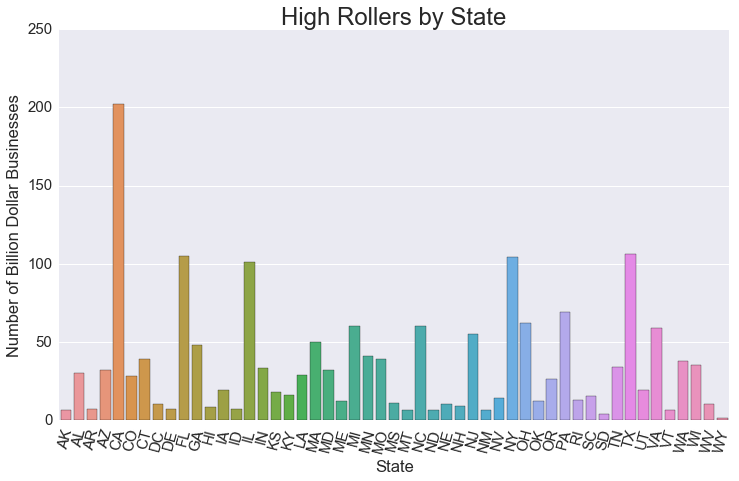

In [63]:
dims = (12, 7)
sns.set(font_scale=1.5)
fig, ax = pyplot.subplots(figsize=dims)
plt.title("High Rollers by State", fontsize = 24)
bills = sns.barplot(x='state', y='address', data=high_rollers)
bills.set(ylabel="Number of Billion Dollar Businesses", xlabel='State')
for item in bills.get_xticklabels():
    item.set_rotation(75)